In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
import warnings
# Filter deprecation warnings from Matplotlib
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

from matplotlib import rc
rc('text', usetex=True)

## Reaction and Classification for each company

In [2]:
def extract(df):
    """Get reaction and Label of reaction for each company"""
    col = ["Exchange Date", "Close", "Open"]
    df = df.loc[:,col]                                                 # extract pre-specified columns
    df["reaction"] = df.loc[:,"Close"]/df.loc[:,"Open"]                # get the investors' reaction  
    df['log_reaction'] = np.log(df['reaction'])                        # log of Close/Open
    df['label']= np.where(df['reaction']>=1, 'Up', 'Down')             # classify the reaction
    df['log_label'] = np.where(df['log_reaction']>=0, 'Up', 'Down')    # classify log(Close/Open) reaction
    """Get the log returns and label them"""
    df['norm_price'] = (df['Close']/df['Close'][0])                    # normalise the close prices
    df['log_rets'] = np.log(df['norm_price']/df['norm_price'].shift(1))# log returns of normed prices
    df.fillna(0, inplace = True)                                       # replace NA with 0
    df['log_rets_label'] = np.where(df['log_rets']>=0, 'Up', 'Down')   # classify log returns
    
    df = df.loc[:, ['Exchange Date', 'reaction', 'label','log_reaction',
                    'log_label', 'norm_price', 'log_rets', 'log_rets_label']] # put together
    return df

## Create one DF:

In [3]:
# Create a Data Frame:
def data_frame(bakka, grieg, leroy, mowi, salmar):
    """Put all the companies in one Data Frame"""
    period = bakka['Exchange Date']
    df = pd.concat([period, bakka, grieg, leroy, mowi, salmar],
              axis = 1)
    # Replace the names:
    companies = ("bakka", "grieg", "leroy", "mowi", "salmar")
    # Changing the names so that they match each company
    react = df['reaction']
    log_react = df['log_reaction']
    labs = df['label']
    lnlabs = df['log_label']
    log_rets = df['log_rets']
    log_rets_label = df['log_rets_label']
    norm_price = df['norm_price']
    df_new_react = [i+'_reaction' for i in companies]
    df_new_lnreact = [i+'_log_reaction' for i in companies]
    df_new_label = [i+'_label' for i in companies]
    df_new_lnlabel = [i+'_ln_label' for i in companies]
    df_log_rets = [i+'_log_returns' for i in companies]
    df_log_rets_lab = [i+'_log_rets_label' for i in companies]
    df_norm_price = [i+'_norm_price' for i in companies]
    react.columns = df_new_react
    log_react.columns = df_new_lnreact
    labs.columns = df_new_label
    lnlabs.columns = df_new_lnlabel
    log_rets.columns = df_log_rets
    log_rets_label.columns = df_log_rets_lab
    norm_price.columns = df_norm_price
    
    
    # put back to dataframe (ONLY the logarithmic reactions: the log(Close/Open) and logarithmic returns):
    df = pd.concat([period, log_react, lnlabs, log_rets, log_rets_label, norm_price],
              axis = 1)
    df['year'] = pd.DatetimeIndex(df['Exchange Date']).year
    df['month'] = pd.DatetimeIndex(df['Exchange Date']).month
    df['day'] = pd.DatetimeIndex(df['Exchange Date']).day
    return df

## Plot Log_Rets or Norm_price for each company:

In [4]:
def create_plot(df, y, y_title, dir_name):
    """Create Logarithmic Returns Plots"""
    date = df['Exchange Date'].iloc[1:]
    a = df.loc[:, df.columns.str.contains(y)].iloc[1:].reset_index().iloc[:,1:]
    companies = ("Bakkafrost", "Grieg Seafood", "Leroy Seafood Group", "Marine Harvest", "SalMar")
    
    for f in range(a.shape[1]):
        plt.figure(figsize=(6, 5))
        plt.plot(date, a.iloc[:,f],  lw=0.7, color = "black")
        plt.title(f"{companies[f]}")
        plt.xlabel("Year")
        plt.ylabel(y_title)
        
        # Save the Plots 
        plt.savefig(f'{dir_name}/{y_title}_{companies[f]}.jpeg')
        plt.savefig(f'{dir_name}/{y_title}_{companies[f]}.eps')
        # Display the plot in the notebook
        plt.show()

# Import Data:

## Daily

In [5]:
# Download Daily Data:
bakka_daily = pd.read_excel('daily/Bakkafrost_04.01.2016-15.07.2022.xlsx')
grieg_daily = pd.read_excel('daily/Grieg_04.01.2016-15.07.2022.xlsx')
leroy_daily = pd.read_excel('daily/Leroy_04.01.2016-15.07.2022.xlsx')
mowi_daily  = pd.read_excel('daily/MOWI_04.01.2016-15.07.2022.xlsx')
salmar_daily = pd.read_excel('daily/SalMar_04.01.2016-15.07.2022.xlsx')

In [6]:
bakka_daily_new = extract(bakka_daily)
grieg_daily_new = extract(grieg_daily)
leroy_daily_new = extract(leroy_daily)
mowi_daily_new  = extract(mowi_daily)
salmar_daily_new = extract(salmar_daily)

In [7]:
# Create a df
df_daily = data_frame(bakka_daily_new, grieg_daily_new, leroy_daily_new, mowi_daily_new, salmar_daily_new)

# Plotting

<IPython.core.display.Javascript object>


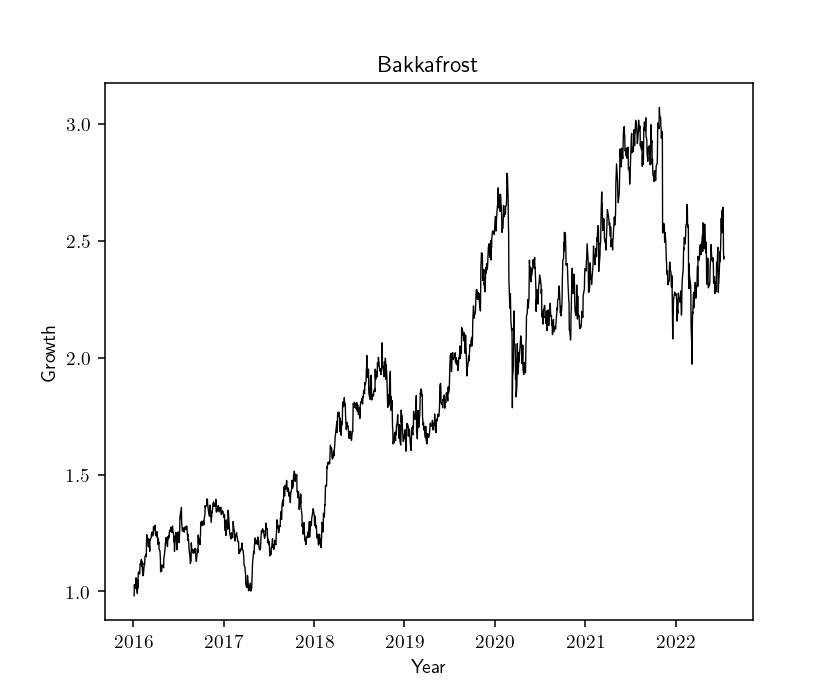

<IPython.core.display.Javascript object>


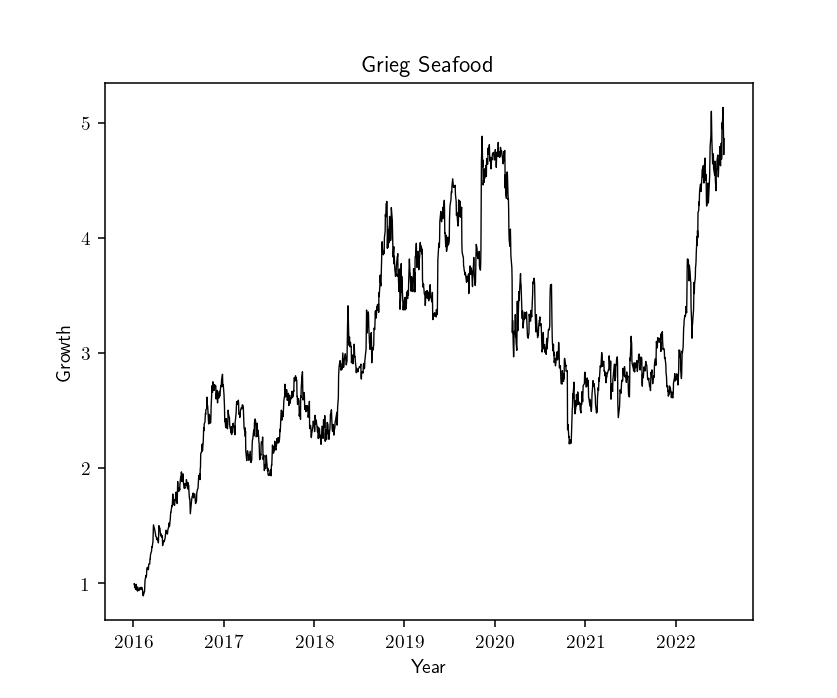

<IPython.core.display.Javascript object>


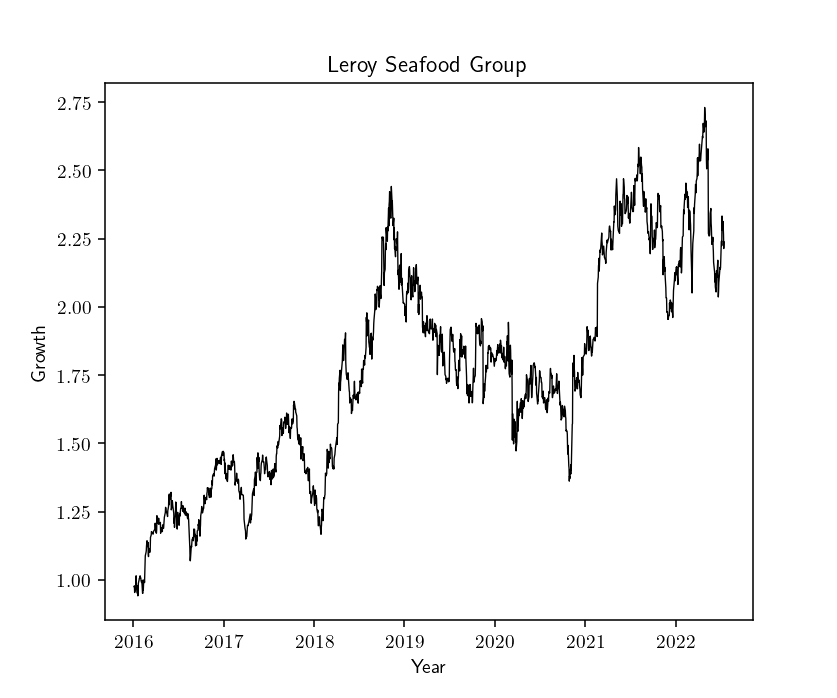

<IPython.core.display.Javascript object>


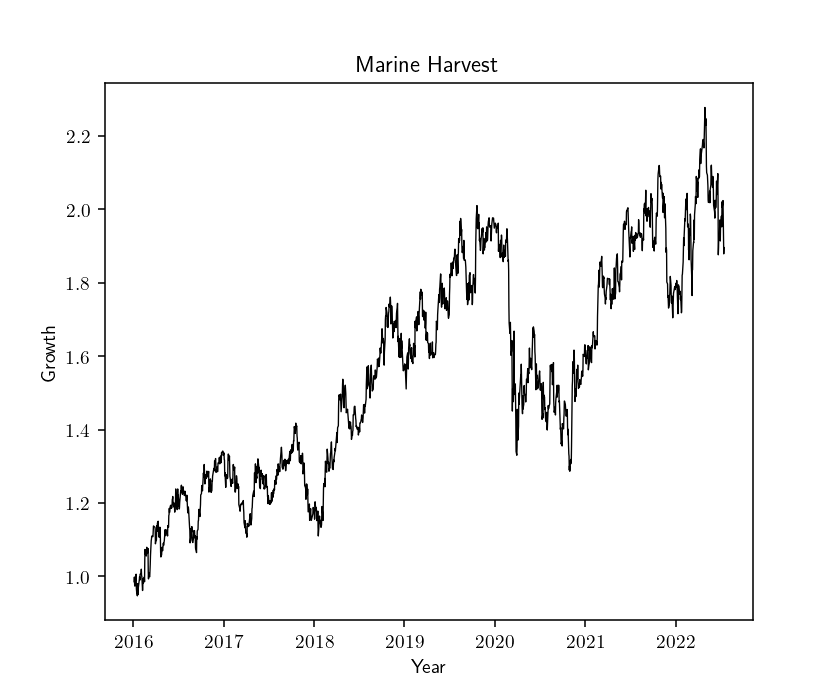

<IPython.core.display.Javascript object>


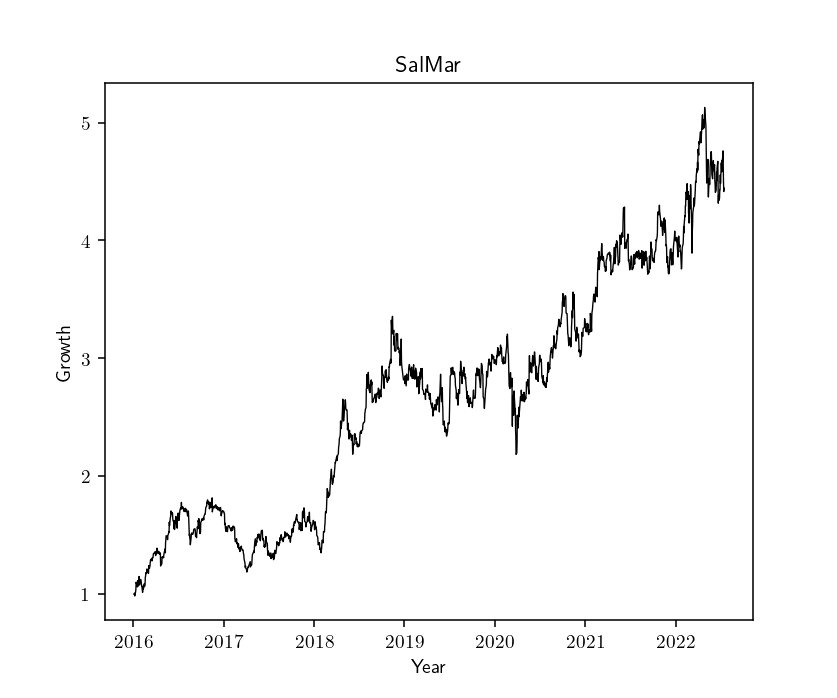

In [8]:
# Run the Plots:
create_plot(df_daily, y = "_norm_price", y_title = "Growth", dir_name = "daily/")  # growth plot

<IPython.core.display.Javascript object>


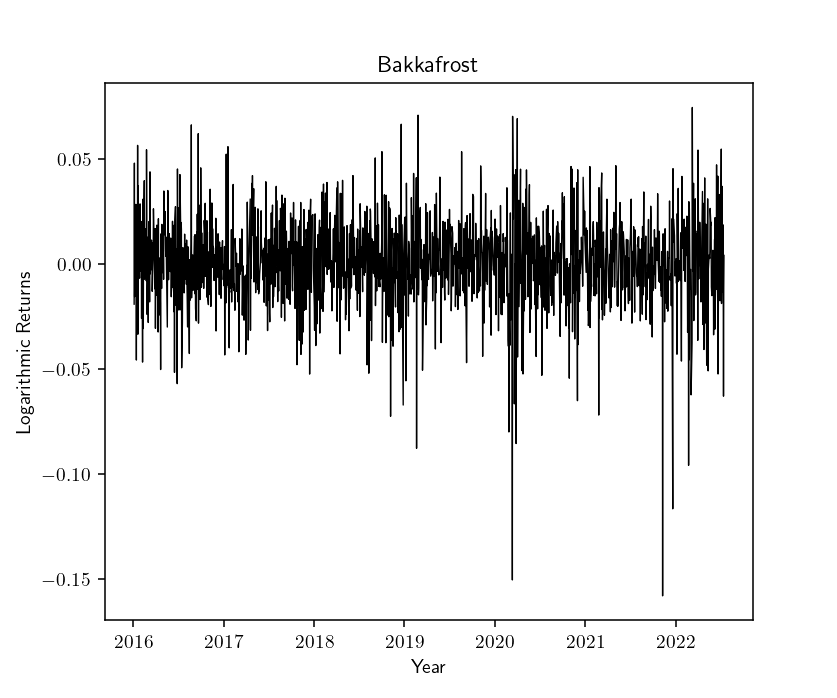

<IPython.core.display.Javascript object>


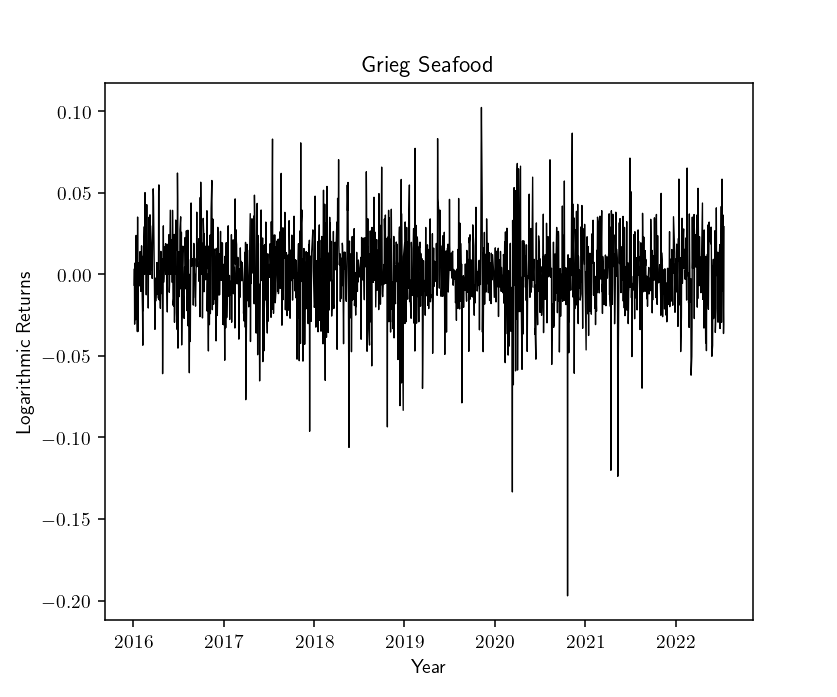

<IPython.core.display.Javascript object>


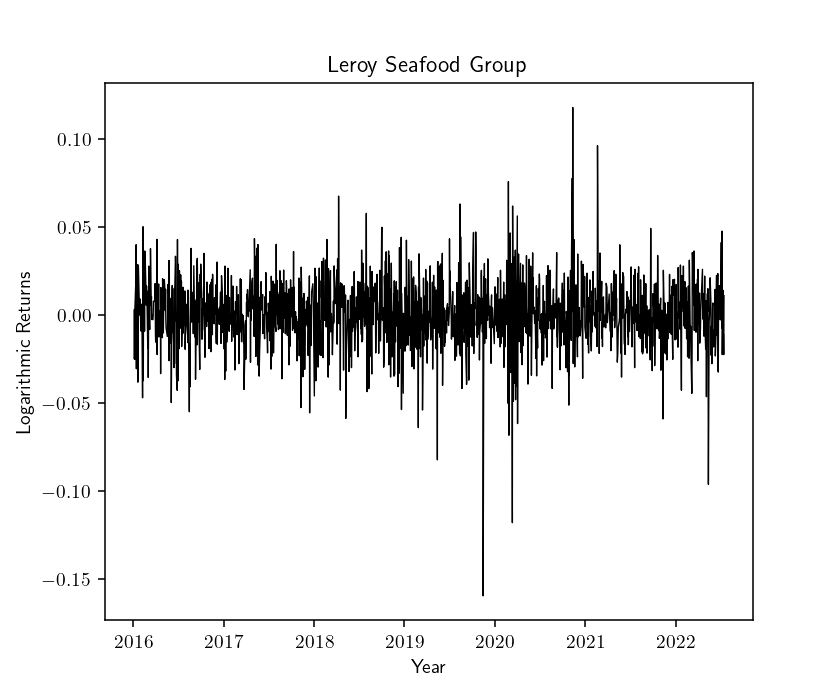

<IPython.core.display.Javascript object>


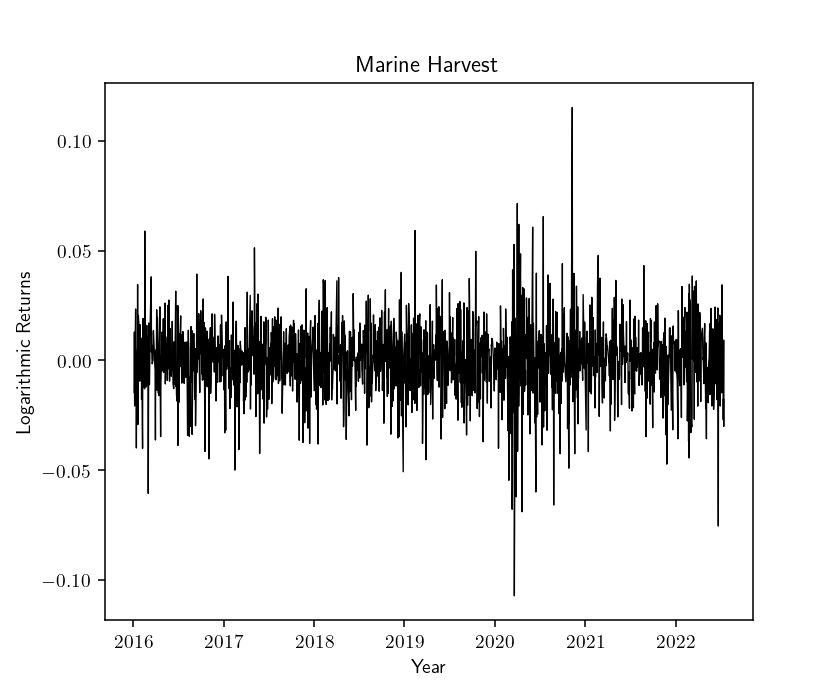

<IPython.core.display.Javascript object>


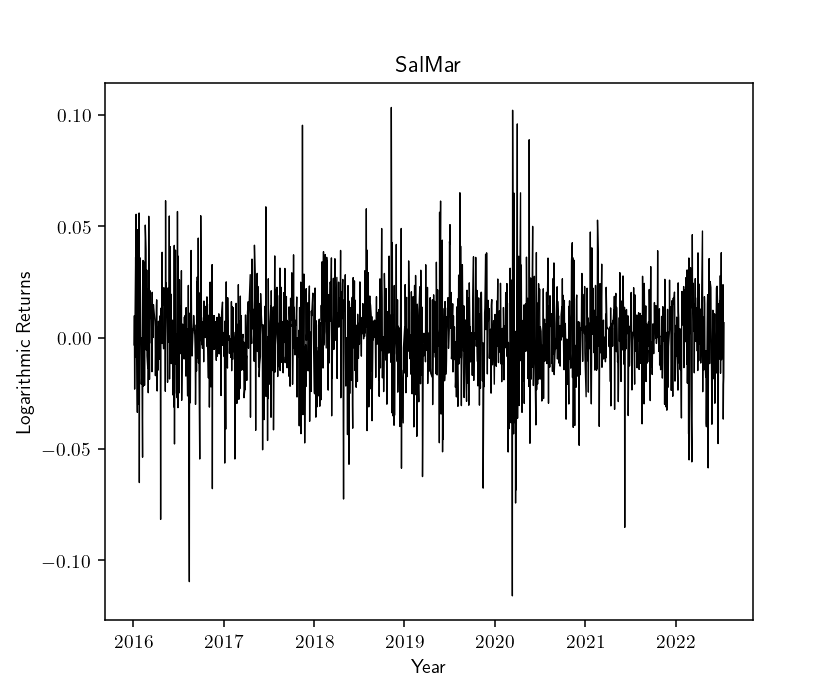

In [9]:
create_plot(df_daily, y = "_log_returns", y_title = "Logarithmic Returns", dir_name = "daily/") # log_returns

# Create  a Shared Index Price:

In [10]:
def df(df):
    col = ["Exchange Date", "Close"]
    df = df.loc[:,col]
    return df

In [11]:
def put_together(bakka, grieg, leroy, mowi, salmar):
    date = bakka['Exchange Date']
    together = []
    for i in (bakka, grieg, leroy, mowi, salmar):
        together.append(df(i)) # a list of 5 lists
    closed_prices = pd.concat([date, together[0]['Close'], together[1]['Close'], 
                               together[2]['Close'], together[3]['Close'], together[4]['Close']], axis = 1)
    companies = ("bakka", "grieg", "leroy", "mowi", "salmar")
    companies_names = [i+"_close" for i in companies]
    cls = closed_prices['Close']
    cls.columns = companies_names
    weight = 0.2
    weighted = []
    for j in range(cls.shape[1]):
        weighted.append((cls.iloc[:,j])*weight)
    weighted = pd.DataFrame(weighted)
    weighted = weighted.transpose()
    weight_names = [i+'_weight' for i in companies]
    weighted.columns = weight_names
    weighted['equally_weighted_index'] = weighted.sum(axis = 1)
    all_prices = pd.concat([date, cls, weighted], axis = 1)
    # The index is normalized so that its logarithm equals one before the first observation (01:2016) 
    all_prices['norm_index'] =(all_prices['equally_weighted_index']/all_prices['equally_weighted_index'][0])
    all_prices['log_ret'] = np.log(all_prices['norm_index']/all_prices['norm_index'].shift(1))
    all_prices.fillna(0, inplace = True)
    all_prices['react_label'] = np.where(all_prices['log_ret']>=0, 'Up', 'Down')
    all_prices['year'] = pd.DatetimeIndex(all_prices['Exchange Date']).year
    all_prices['month'] = pd.DatetimeIndex(all_prices['Exchange Date']).month
    all_prices['day'] = pd.DatetimeIndex(all_prices['Exchange Date']).day
    return (all_prices)

## Daily

In [12]:
daily_spi = put_together(bakka_daily, grieg_daily, leroy_daily, mowi_daily, salmar_daily)
daily_spi.to_csv('daily/SPI_daily.csv', index = False)

## Plots:

In [13]:
def plot_spi(df, y, y_title, dir_name):
    date = df['Exchange Date'].iloc[1:]
    plt.figure(figsize=(6, 5))
    plt.plot(date, df[y].iloc[1:],  lw=0.7, color = "black")
    plt.title("Share Price Index")
    plt.xlabel("Year")
    plt.ylabel(y_title)
    
    # Save the Plots 
    plt.savefig(f'{dir_name}/SPI_{y_title}_daily.jpeg')
    plt.savefig(f'{dir_name}/SPI_{y_title}_daily.eps')
    plt.show()

<IPython.core.display.Javascript object>


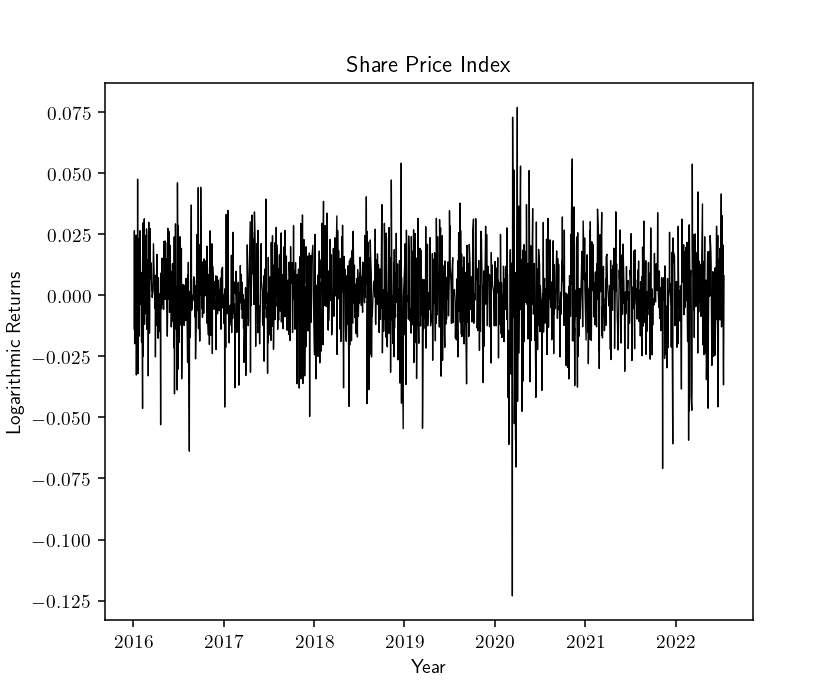

In [14]:
plot_spi(df = daily_spi, y = 'log_ret', y_title = "Logarithmic Returns", dir_name = "daily")

<IPython.core.display.Javascript object>


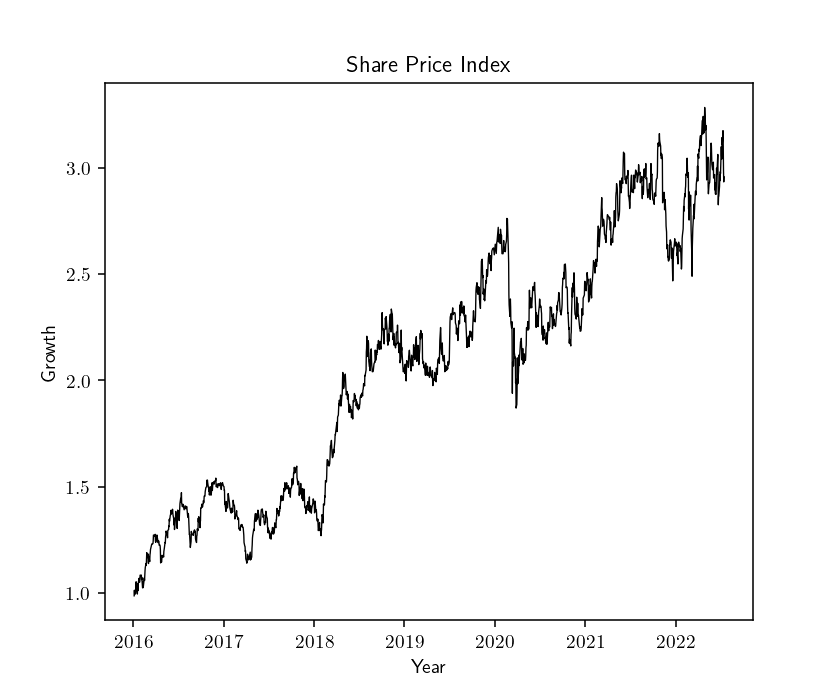

In [15]:
plot_spi(df = daily_spi, y = 'norm_index', y_title = "Growth", dir_name = "daily")